In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import sys
import os
import torch

In [144]:
ENERGY_PATH = "data/energy/"
WEATHER_PATH = "data/weather/Weather_Data_Germany.csv"

weather_data = pd.read_csv(WEATHER_PATH, sep=",")

prices_data = pd.read_csv(ENERGY_PATH + "Prices_Europe.csv", sep=";")
installed_capacity = pd.read_csv(ENERGY_PATH + "Installed_Capacity_Germany.csv", sep=";")
weather_data.tail()

,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
2104315,14.8,51.2,2021-12-31 00:00:00,2021-12-31 23:00:00,2835274.0,2180.3394,101831.690,838.02860,1.000008,6.772395,-0.635157,283.54050,2171042.0,4075276.0,10313.742,0.001773,0.680833,11.236713,-1.493503
2104316,14.8,50.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3174462.0,1949.3633,102003.055,815.65460,0.981605,5.854994,0.206125,284.05286,3600288.0,5727868.0,25293.312,0.000539,0.622661,10.005124,-0.225957
2104317,14.8,49.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3614996.0,4384.6490,102251.730,741.03357,0.630130,5.271448,-1.014326,281.04538,3281948.0,5547652.0,25715.790,0.002406,0.851062,9.639029,-2.366759
2104318,14.8,48.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3894518.0,3073.1455,102469.890,420.26746,0.440941,4.102491,-0.592839,280.20236,4438841.0,6871398.0,27216.710,0.000576,0.897962,8.555898,-1.410386
2104319,14.8,47.2,2021-12-31 00:00:00,2021-12-31 23:00:00,4849962.0,9583.7320,102244.875,37.15387,0.035555,1.795015,-0.220017,273.95093,4189784.0,6439440.0,28799.164,0.000000,1.819780,4.665255,-2.722088


In [145]:

weather_data['time'] = pd.to_datetime(weather_data['time'], format='%Y-%m-%d %H:%M:%S')
#weather_data['forecast_origin'] = pd.to_datetime(weather_data['forecast_origin'], format='%Y-%m-%d %H:%M:%S')
"""

march_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')
october_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')
weather_data[weather_data['time'].dt.date.isin(march_2019.date)].head()
"""

"\n\nmarch_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')\noctober_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')\nweather_data[weather_data['time'].dt.date.isin(march_2019.date)].head()\n"

In [146]:
weather_data.tail()


,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
2104315,14.8,51.2,2021-12-31 00:00:00,2021-12-31 23:00:00,2835274.0,2180.3394,101831.690,838.02860,1.000008,6.772395,-0.635157,283.54050,2171042.0,4075276.0,10313.742,0.001773,0.680833,11.236713,-1.493503
2104316,14.8,50.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3174462.0,1949.3633,102003.055,815.65460,0.981605,5.854994,0.206125,284.05286,3600288.0,5727868.0,25293.312,0.000539,0.622661,10.005124,-0.225957
2104317,14.8,49.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3614996.0,4384.6490,102251.730,741.03357,0.630130,5.271448,-1.014326,281.04538,3281948.0,5547652.0,25715.790,0.002406,0.851062,9.639029,-2.366759
2104318,14.8,48.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3894518.0,3073.1455,102469.890,420.26746,0.440941,4.102491,-0.592839,280.20236,4438841.0,6871398.0,27216.710,0.000576,0.897962,8.555898,-1.410386
2104319,14.8,47.2,2021-12-31 00:00:00,2021-12-31 23:00:00,4849962.0,9583.7320,102244.875,37.15387,0.035555,1.795015,-0.220017,273.95093,4189784.0,6439440.0,28799.164,0.000000,1.819780,4.665255,-2.722088


In [147]:
#average the first 80 values of z
avg_z = np.mean(weather_data['z'][:80])
print(avg_z)

3360.2965609700004


In [148]:
# Converting 'forecast_origin' and 'time' to datetime
weather_data['forecast_origin'] = pd.to_datetime(weather_data['forecast_origin'])
weather_data['time'] = pd.to_datetime(weather_data['time'])

# Calculate the hourly averages while keeping 'time' and 'forecast_origin' columns
averages = weather_data.groupby('time').mean().reset_index()
averages['forecast_origin'] = weather_data['forecast_origin'].iloc[0]

# longitudes and latitudes no longer needed
averages.drop(['longitude', 'latitude'], axis=1, inplace=True)
averages.head()

,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100,forecast_origin
0,2019-01-01 00:00:00,0.0,3360.296561,103009.967750,507.635043,0.966562,3.867164,1.065368,278.216013,0.0,0.0,0.0,0.000000,0.741971,6.545994,1.122055,2019-01-01
1,2019-01-01 01:00:00,0.0,3360.296561,102964.489612,544.627164,0.959348,4.092345,1.116217,278.310794,0.0,0.0,0.0,0.000038,0.742205,6.838839,1.241379,2019-01-01
2,2019-01-01 02:00:00,0.0,3360.296561,102908.208325,575.103757,0.966846,4.320050,1.223478,278.206292,0.0,0.0,0.0,0.000070,0.742254,7.183921,1.428783,2019-01-01
3,2019-01-01 03:00:00,0.0,3360.296561,102827.034387,612.314609,0.979125,4.638074,1.222571,278.140331,0.0,0.0,0.0,0.000099,0.742272,7.660834,1.501984,2019-01-01
4,2019-01-01 04:00:00,0.0,3360.296561,102725.913987,660.112603,0.981526,4.980449,1.055763,278.102989,0.0,0.0,0.0,0.000135,0.742255,8.147790,1.289936,2019-01-01


In [149]:
# number of weather stations   
print("Number of unique longitude-latitude pairs: ", weather_data.groupby(["longitude", "latitude"]).ngroups)

Number of unique longitude-latitude pairs:  80


In [150]:
#column where t2m is converted to celsius from kelvin
averages['t2m_C'] = averages['t2m'] - 273.15

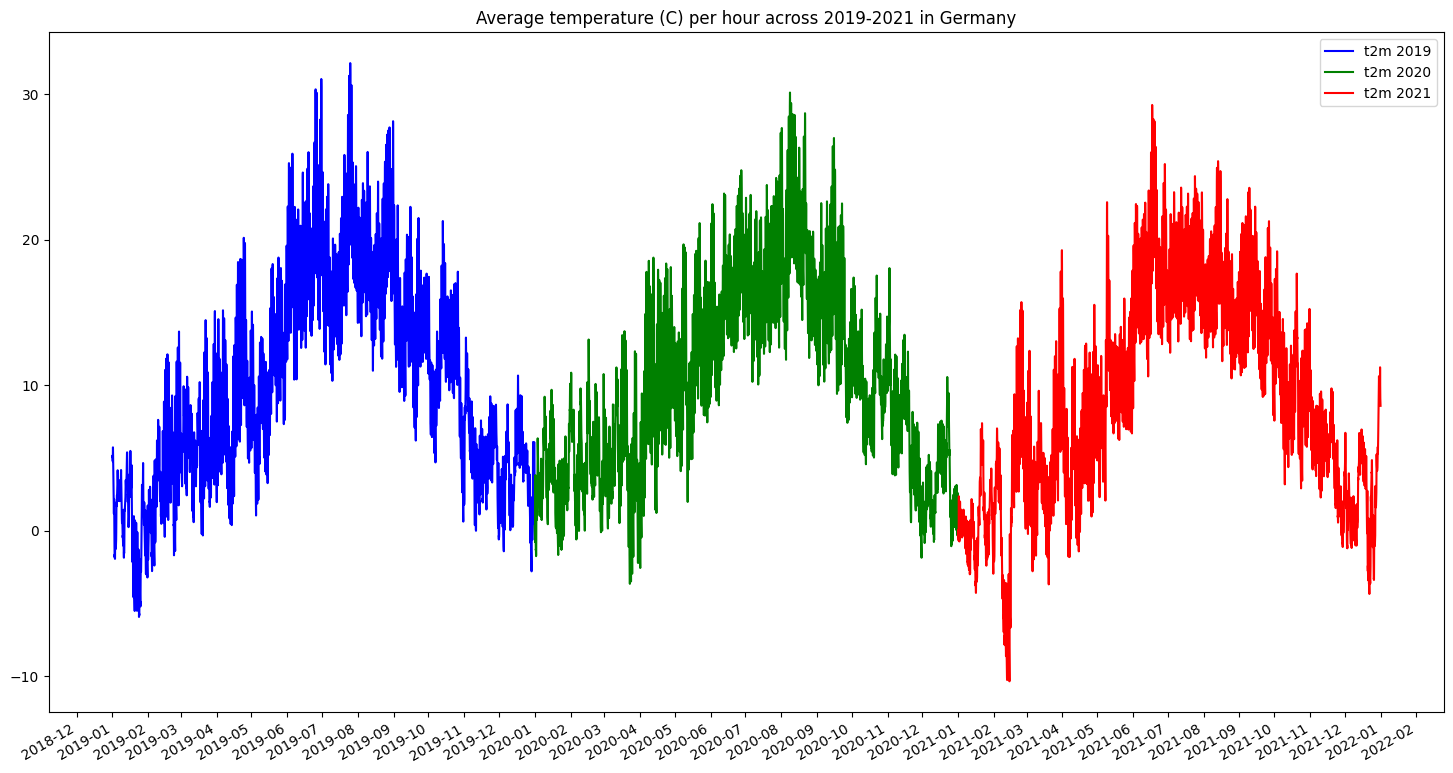

In [151]:
#plot ssr and t2m for each year separately
# add ticks on x axis for 
import matplotlib.dates as mdates

averages['time'] = pd.to_datetime(averages['time'])  # Make sure 'time' is in datetime format

plt.figure(figsize=(18, 10))

# Define colors or line styles if you want distinct appearances
colors = ['blue', 'green', 'red']
years = range(2019, 2022)

for i, year in enumerate(years):
    # Filter data for each year
    year_data = averages[averages['time'].dt.year == year]
    
    # Plot each year's data
    plt.plot(year_data['time'], year_data['t2m_C'], label=f't2m {year}', color=colors[i])

# Set x-axis major ticks to the first day of each month and format them
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optional: Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.title("Average temperature (C) per hour across 2019-2021 in Germany")
plt.show()

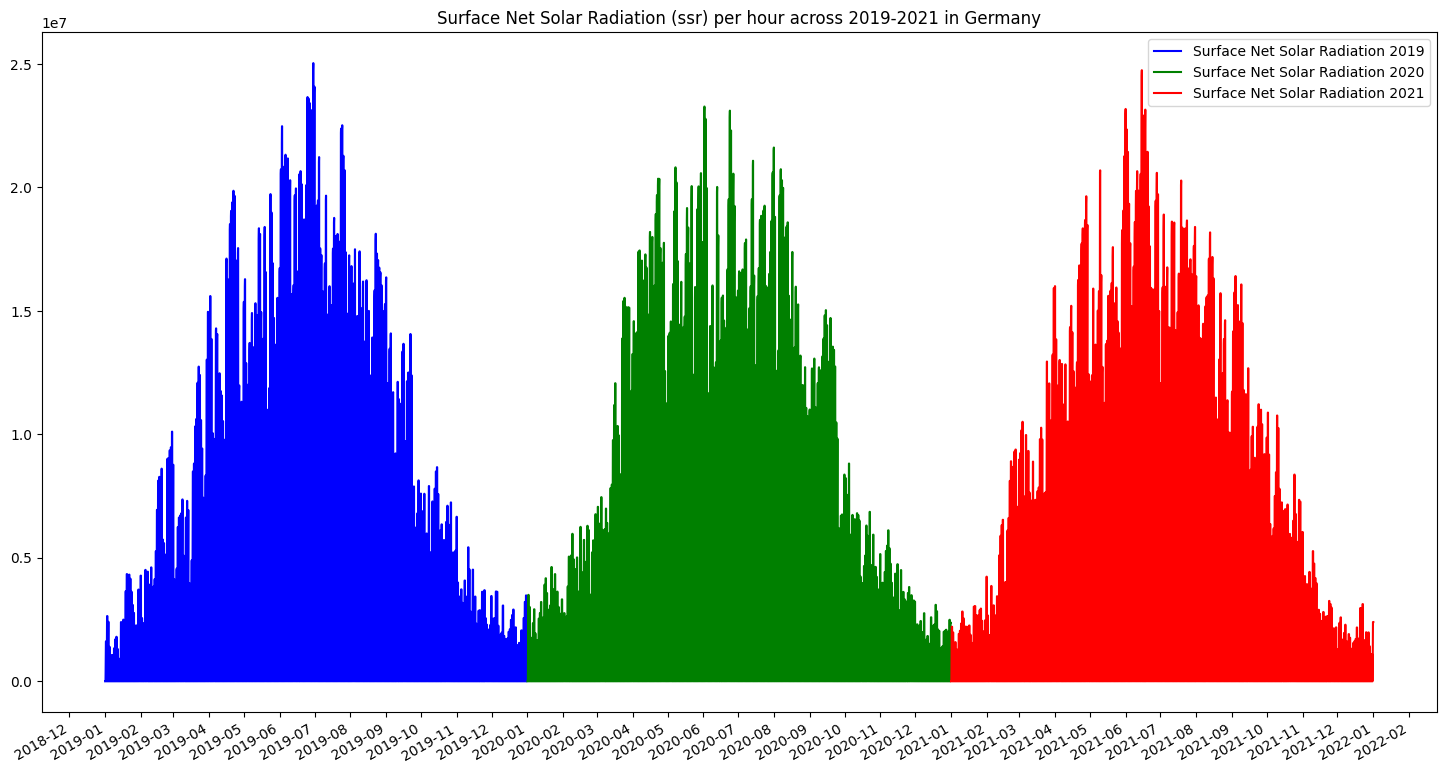

In [152]:
#same as above but for srr
averages['time'] = pd.to_datetime(averages['time'])  # Convert 'time' to datetime format

plt.figure(figsize=(18, 10))

# Define colors or line styles for visual distinction
colors = ['blue', 'green', 'red']  # Different colors for each year
years = range(2019, 2022)

for i, year in enumerate(years):
    # Filter data for each year
    year_data = averages[averages['time'].dt.year == year]
    
    # Plot 'srr' data for each year
    plt.plot(year_data['time'], year_data['ssr'], label=f'Surface Net Solar Radiation {year}', color=colors[i])

# Set x-axis major ticks to the first day of each month and format them
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optional: Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.title("Surface Net Solar Radiation (ssr) per hour across 2019-2021 in Germany")
plt.show()

In [153]:
# find most significant variables in data for solar energy prediction / wind energy prediction
# normalize data + further pre processing
# build model
# train small train split for debugging
# train entire model
# finde tune hyperparameters with validation set    
# test model on test set

In [154]:
demand_data = pd.read_csv(ENERGY_PATH + "Reaslised_Demand_Germany.csv", sep=";")
demand_data.head()

,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
0,01.01.19 00:00,01.01.19 00:15,"10.982,75","5.349,25","456,75"
1,01.01.19 00:15,01.01.19 00:30,"10.864,75","5.040,50","333,75"
2,01.01.19 00:30,01.01.19 00:45,"10.737,75","4.732,50",280
3,01.01.19 00:45,01.01.19 01:00,"10.680,25","4.617,50","304,5"
4,01.01.19 01:00,01.01.19 01:15,"10.599,00","4.485,00","249,75"


In [155]:
supply_data = pd.read_csv(ENERGY_PATH + "Realised_Supply_Germany.csv", sep=";")
supply_data.tail()

,Date from,Date to,Biomass [MW],Hydro Power [MW],Wind Offshore [MW],Wind Onshore [MW],Photovoltaic [MW],Other Renewable [MW],Nuclear Power [MW],Lignite [MW],Coal [MW],Natural Gas [MW],Pumped Storage [MW],Other Conventional [MW]
140251,31.12.22 22:45,31.12.22 23:00,"1.118,75","308,75","874,75","7.660,50",0,"30,5","759,75","940,5","551,75",394,29,"304,25"
140252,31.12.22 23:00,31.12.22 23:15,"1.111,25","317,75","842,5","7.390,25",0,"30,5","722,25","953,75","549,75","385,5",251,"305,25"
140253,31.12.22 23:15,31.12.22 23:30,"1.112,25",310,"852,25","7.356,00",0,"30,5","684,5","951,25","552,25","387,25","63,25","307,75"
140254,31.12.22 23:30,31.12.22 23:45,"1.109,25","311,5","842,25","7.301,75",0,"30,5","648,25","953,25",551,"391,5","15,25",307
140255,31.12.22 23:45,01.01.23 00:00,"1.109,75","310,25","806,75","7.258,00",0,"30,5","614,5","956,5","549,5","385,5","14,25","307,25"


In [156]:
import pytz
# find time shift from winter to summer time in demand data "Date from" key



# change them to range from 01.01.2019 to 31.12.2022 in 15 minute invtervals
date_range_from = pd.date_range(start='2019-01-01 00:00', end='2022-12-31 23:45', freq='15min')
date_range_to = pd.date_range(start='2019-01-01 00:15', end='2023-01-01 00:00', freq='15min')
date_range_from_prices = pd.date_range(start='2019-01-01 00:00', end='2022-12-31 23:00', freq='1H')
date_range_to_prices = pd.date_range(start='2019-01-01 01:00', end='2023-01-01 00:00', freq='1H')
demand_data['Date from'] = date_range_from
demand_data['Date to'] = date_range_to
supply_data['Date from'] = date_range_from
supply_data['Date to'] = date_range_to
prices_data['Date from'] = date_range_from_prices
prices_data['Date to'] = date_range_to_prices
demand_data['Date from'] = pd.to_datetime(demand_data['Date from'],format='%d.%m.%y %H:%M')
demand_data['Date to'] = pd.to_datetime(demand_data['Date to'], format='%d.%m.%y %H:%M')
supply_data['Date from'] = pd.to_datetime(supply_data['Date from'], format='%d.%m.%y %H:%M')
supply_data['Date to'] = pd.to_datetime(supply_data['Date to'], format='%d.%m.%y %H:%M')
prices_data['Date from'] = pd.to_datetime(prices_data['Date from'],format='%d.%m.%y %H:%M')
prices_data['Date to'] = pd.to_datetime(prices_data['Date to'],format='%d.%m.%y %H:%M')
installed_capacity['Date from'] = pd.to_datetime(installed_capacity['Date from'])
installed_capacity['Date to'] = pd.to_datetime(installed_capacity['Date to'])


In [157]:
# get all days of march in 2019
march_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')
october_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')
# show all instances in demanddata
demand_data[demand_data['Date from'].dt.date.isin(march_2019.date)].head(10)

#demand_data[demand_data['Date from'].dt.date.isin(october_2019.date)].head(50)

,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
8544,2019-03-31 00:00:00,2019-03-31 00:15:00,"10.918,25","8.702,25","321,5"
8545,2019-03-31 00:15:00,2019-03-31 00:30:00,"10.817,00","8.551,25",339
8546,2019-03-31 00:30:00,2019-03-31 00:45:00,"10.624,50","8.285,00","444,5"
8547,2019-03-31 00:45:00,2019-03-31 01:00:00,"10.538,25","8.134,75","656,5"
8548,2019-03-31 01:00:00,2019-03-31 01:15:00,"10.436,00","8.041,50","425,25"
8549,2019-03-31 01:15:00,2019-03-31 01:30:00,"10.321,50","7.914,25",499
8550,2019-03-31 01:30:00,2019-03-31 01:45:00,"10.262,25","7.832,00","563,25"
8551,2019-03-31 01:45:00,2019-03-31 02:00:00,"7.354,50","4.910,75","672,25"
8552,2019-03-31 02:00:00,2019-03-31 02:15:00,"10.128,75","7.773,25","669,5"
8553,2019-03-31 02:15:00,2019-03-31 02:30:00,"10.123,25","7.659,00","712,5"


In [158]:
# convert to UTC
demand_data['Date from'] = demand_data['Date from'].dt.tz_localize('UTC')
demand_data['Date to'] = demand_data['Date to'].dt.tz_localize('UTC')

supply_data['Date from'] = supply_data['Date from'].dt.tz_localize('UTC')
supply_data['Date to'] = supply_data['Date to'].dt.tz_localize('UTC')
prices_data['Date from'] = prices_data['Date from'].dt.tz_localize('UTC')
prices_data['Date to'] = prices_data['Date to'].dt.tz_localize('UTC')
installed_capacity['Date from'] = installed_capacity['Date from'].dt.tz_localize('UTC')
installed_capacity['Date to'] = installed_capacity['Date to'].dt.tz_localize('UTC')



In [159]:
#only use data until the end of 2021
demand_data_train = demand_data
supply_data_train = supply_data

demand_data_train.tail()



,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
140251,2022-12-31 22:45:00+00:00,2022-12-31 23:00:00+00:00,"10.457,75","1.922,50","976,75"
140252,2022-12-31 23:00:00+00:00,2022-12-31 23:15:00+00:00,"10.331,25","2.098,50","900,5"
140253,2022-12-31 23:15:00+00:00,2022-12-31 23:30:00+00:00,"10.339,50","2.131,25","871,75"
140254,2022-12-31 23:30:00+00:00,2022-12-31 23:45:00+00:00,"10.220,75","2.076,75",873
140255,2022-12-31 23:45:00+00:00,2023-01-01 00:00:00+00:00,"10.104,25","2.039,50","952,25"


In [160]:
def clean_convert_to_float(x):
    if not isinstance(x, str):
        return x
    x = x.replace('.', '').replace(',', '.')
    try:
        return float(x)
    except ValueError:
        return x
    

demand_data_train.iloc[:, 2:] = demand_data_train.iloc[:, 2:].applymap(clean_convert_to_float)


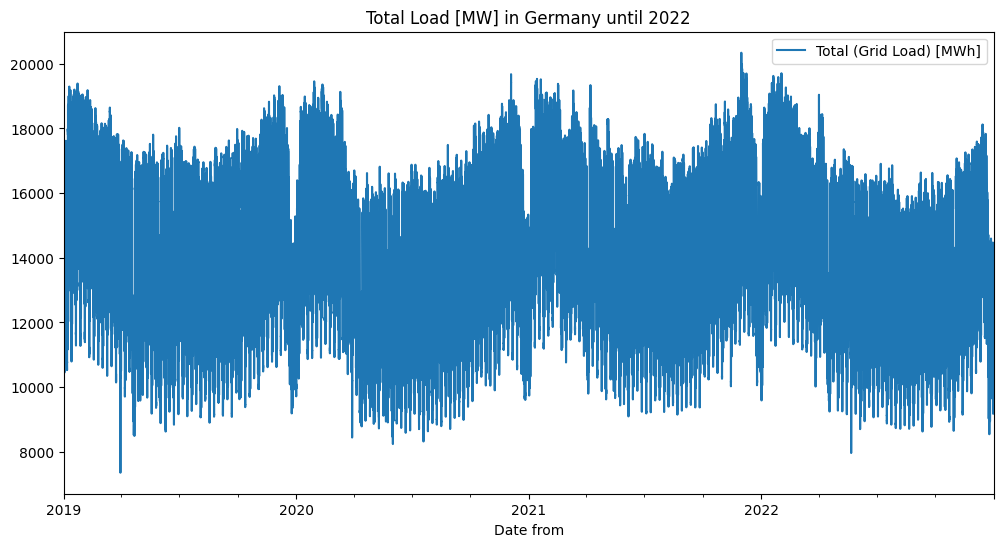

In [161]:


demand_data_train.plot(figsize=(12, 6), x='Date from', y='Total (Grid Load) [MWh]')
plt.title("Total Load [MW] in Germany until 2022")
plt.show()

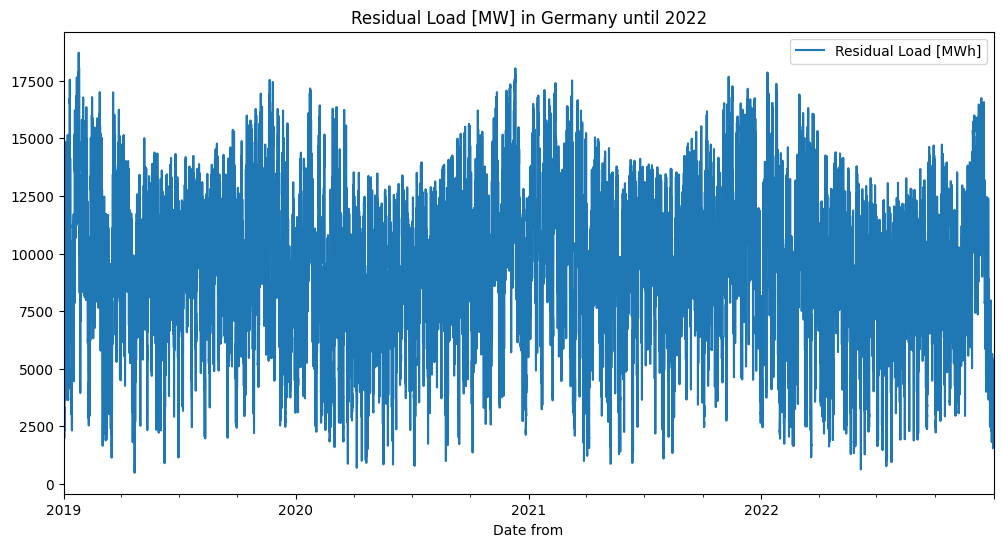

In [162]:
demand_data_train.plot(figsize=(12, 6), x='Date from', y='Residual Load [MWh]')
plt.title("Residual Load [MW] in Germany until 2022")
plt.show()

In [163]:

#fix typo in column name for wind offshore
supply_data_train.rename(columns={'Wind Offshore [MW] ': 'Wind Offshore [MW]'}, inplace=True)
supply_data_train.columns.values

array(['Date from', 'Date to', 'Biomass [MW]', 'Hydro Power [MW]',
       'Wind Offshore [MW]', 'Wind Onshore [MW]', 'Photovoltaic [MW]',
       'Other Renewable [MW]', 'Nuclear Power [MW]', 'Lignite [MW]',
       'Coal [MW]', 'Natural Gas [MW]', 'Pumped Storage [MW]',
       'Other Conventional [MW]'], dtype=object)

In [164]:
supply_data_train.iloc[:, 2:] = supply_data_train.iloc[:, 2:].applymap(clean_convert_to_float)
supply_data_train["Wind total [MW]"] = supply_data_train[["Wind Offshore [MW]","Wind Onshore [MW]"]].sum( axis=1)
# make sure it is float
supply_data_train["Wind total [MW]"].head()

0    5633.50
1    5824.25
2    6005.25
3    6062.75
4    6114.00
Name: Wind total [MW], dtype: float64

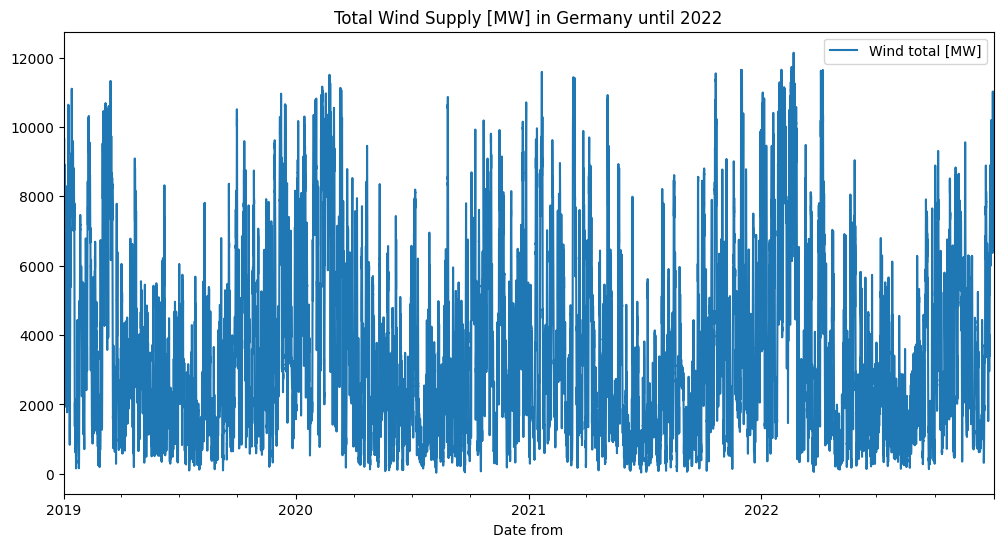

In [165]:
# plot total wind supply and photovoltaic supply
supply_data_train.plot(figsize=(12, 6) ,x='Date from', y='Wind total [MW]')
plt.title("Total Wind Supply [MW] in Germany until 2022")
plt.show()


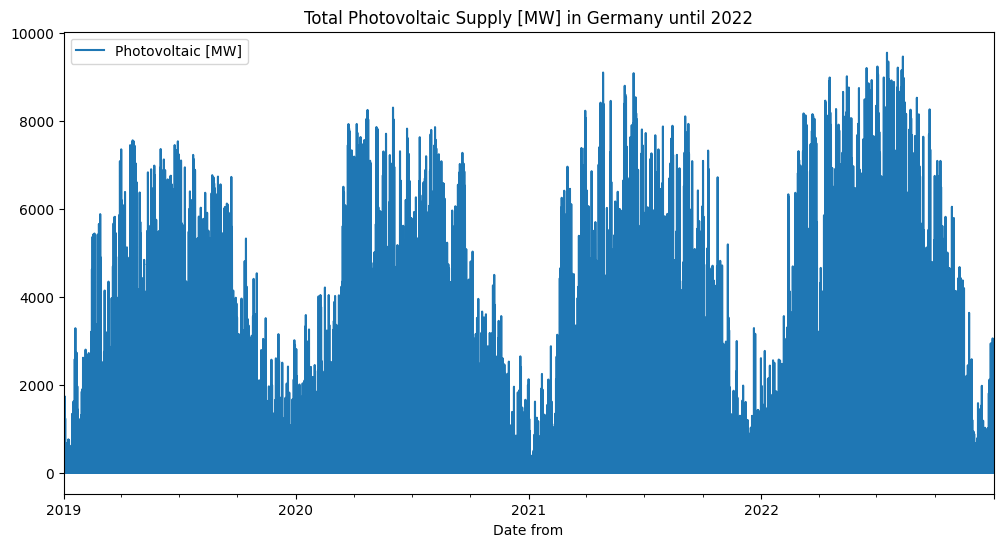

In [166]:
supply_data_train.plot(figsize=(12, 6) ,x='Date from', y='Photovoltaic [MW]')
plt.title("Total Photovoltaic Supply [MW] in Germany until 2022")
plt.show()


In [167]:
installed_capacity_train = installed_capacity
installed_capacity_train.iloc[:, 2:] = installed_capacity_train.iloc[:, 2:].applymap(clean_convert_to_float)

prices_data_train = prices_data
prices_data_train.replace('-', np.nan, inplace=True)
prices_data_train.iloc[:, 2:] = prices_data_train.iloc[:, 2:].applymap(clean_convert_to_float)

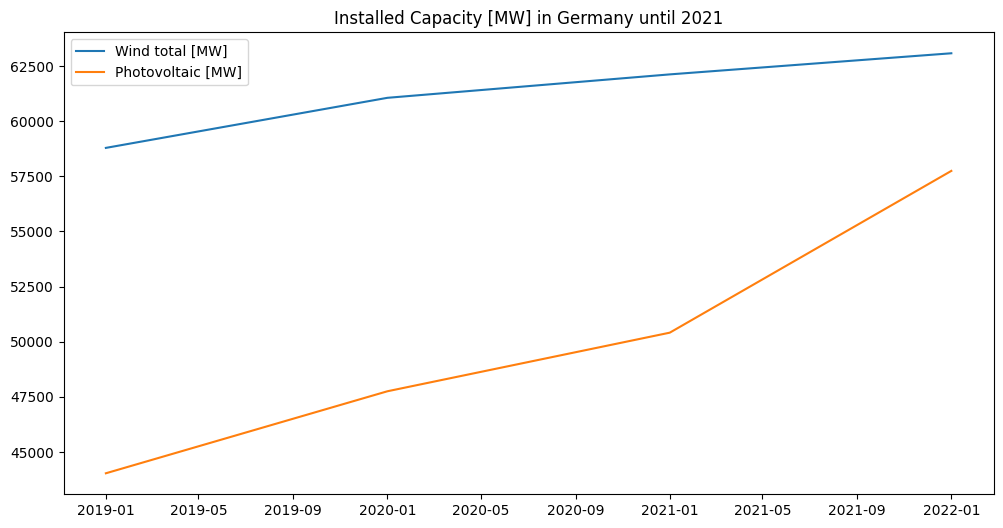

In [168]:
# combine wind offshore and onshore install capacity
installed_capacity_train["Wind total [MW]"] = installed_capacity_train[["Wind Offshore [MW] ", "Wind Onshore [MW]"]].sum(axis=1)
# plot wind total and photovoltaic installed capacity
plt.figure(figsize=(12, 6))
plt.plot(installed_capacity_train['Date from'], installed_capacity_train['Wind total [MW]'], label='Wind total [MW]')
plt.plot(installed_capacity_train['Date from'], installed_capacity_train['Photovoltaic [MW]'], label='Photovoltaic [MW]')
plt.title("Installed Capacity [MW] in Germany until 2021")
plt.legend()
plt.show()

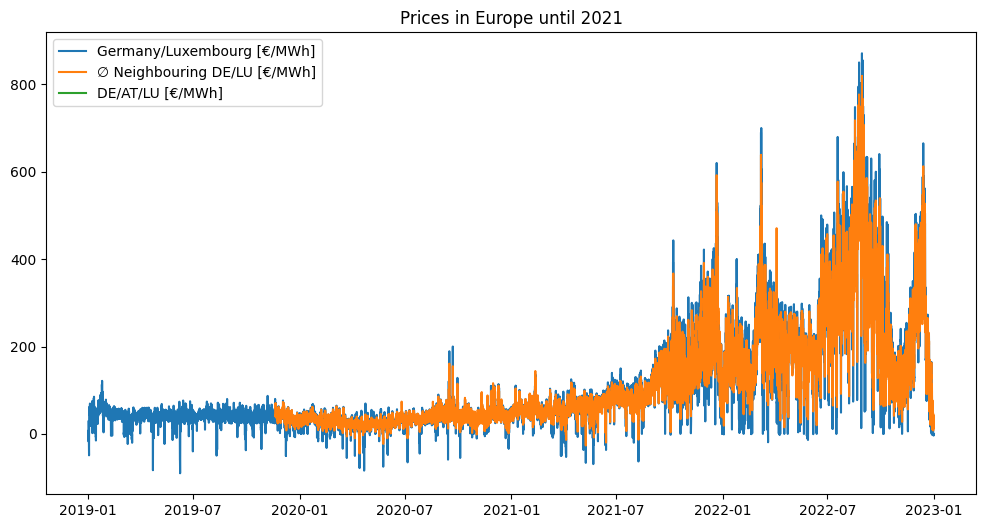

In [169]:
# plot all prices in one big plot
plt.figure(figsize=(12, 6))
for column in ['Germany/Luxembourg [€/MWh]', '∅ Neighbouring DE/LU [€/MWh]', 'DE/AT/LU [€/MWh]']:
    plt.plot(prices_data_train['Date from'], prices_data_train[column], label=column)
plt.title("Prices in Europe until 2021")
plt.legend()
plt.show()


Prices for DE/AT/LU are missing completely and avg Neighbouring DE/LU is incomplete so I will not consider them for further training

In [170]:
print(10982.75	+ 10864.75	+ 10737.75	+ 10680.25	)

43265.5


In [171]:
# combine 15 minute intervals to hourly intervals in demand data
demand_data_train_hourly = demand_data_train.resample('H', on='Date from').sum()
#demand_data_test_hourly = demand_data_test.resample('H', on='Date from').sum()

assert len(demand_data_train_hourly.index) == len(demand_data_train.index) // 4

In [172]:
supply_data_train_hourly = supply_data_train.resample('H', on='Date from').sum()
#supply_data_test_hourly = supply_data_test.resample('H', on='Date from').sum()
assert len(supply_data_train_hourly.index) == len(supply_data_train.index) // 4

In [173]:
# convert weather data to UTC
averages['time'] = averages['time'].dt.tz_localize('UTC')
averages['forecast_origin'] = averages['forecast_origin'].dt.tz_localize('UTC')


In [174]:
demand_data_train_hourly.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
Date from,,,
2019-01-01 00:00:00+00:00,43265.50,19739.75,1375.0
2019-01-01 01:00:00+00:00,41654.00,16420.25,1533.5
2019-01-01 02:00:00+00:00,40113.75,14440.25,2598.5
2019-01-01 03:00:00+00:00,39313.00,12123.00,3433.5
2019-01-01 04:00:00+00:00,39097.25,10120.25,3826.0


Text(0.5, 1.0, 'Total Load [MW] in Germany until 2021')

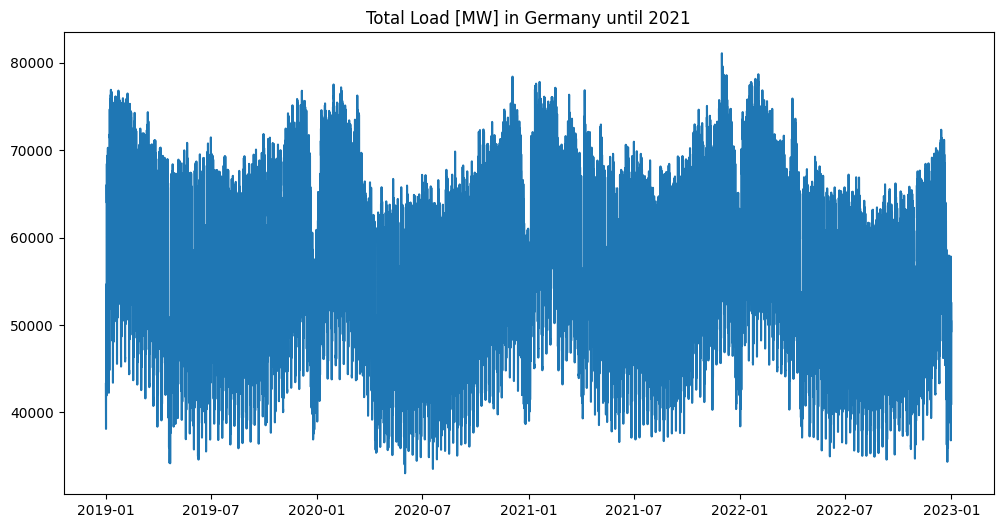

In [175]:
#plot demand data trained hourly
plt.figure(figsize=(12, 6))
plt.plot(demand_data_train_hourly.index, demand_data_train_hourly['Total (Grid Load) [MWh]'])
plt.title("Total Load [MW] in Germany until 2021")


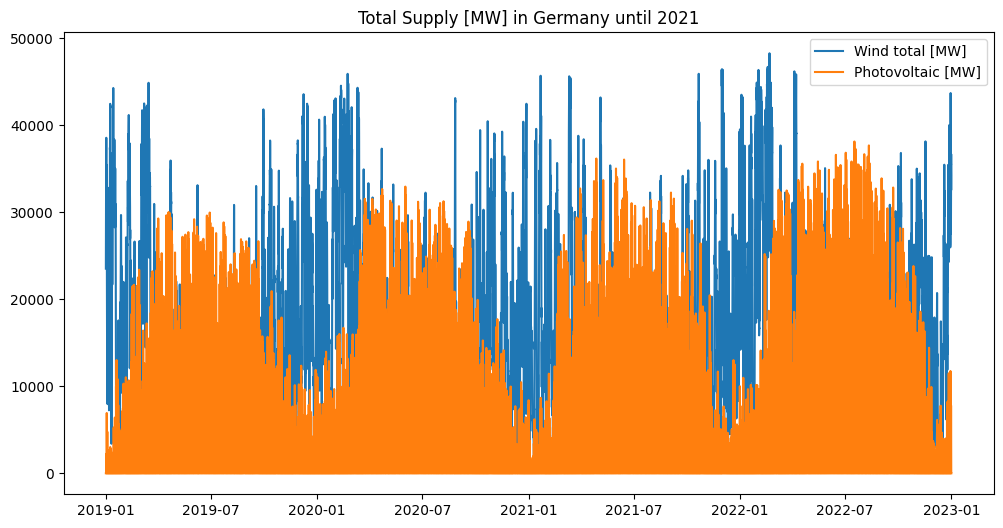

In [176]:
#plot supply data trained hourly
plt.figure(figsize=(12, 6))
plt.plot(supply_data_train_hourly.index, supply_data_train_hourly['Wind total [MW]'], label='Wind total [MW]')
plt.plot(supply_data_train_hourly.index, supply_data_train_hourly['Photovoltaic [MW]'], label='Photovoltaic [MW]')
plt.title("Total Supply [MW] in Germany until 2021")
plt.legend()
plt.show()

In [177]:
#find columns with missing values
missing_demand = demand_data_train.isnull().sum()
missing_supply = supply_data_train.isnull().sum()
missing_weather = weather_data.isnull().sum()
missing_prices = prices_data_train.isnull().sum()
missing_capacity = installed_capacity_train.isnull().sum()
print("Missing values in demand data: \n", missing_demand[missing_demand > 0])
print("Missing values in supply data: \n", missing_supply[missing_supply > 0])
print("Missing values in weather data: \n", missing_weather[missing_weather > 0])
print("Missing values in prices data: \n", missing_prices[missing_prices > 0])
print("Missing values in capacity data: \n", missing_capacity[missing_capacity > 0])

Missing values in demand data: 
 Series([], dtype: int64)
Missing values in supply data: 
 Series([], dtype: int64)
Missing values in weather data: 
 Series([], dtype: int64)
Missing values in prices data: 
 ∅ Neighbouring DE/LU [€/MWh]     7776
Poland [€/MWh]                   7776
DE/AT/LU [€/MWh]                35064
Hungary [€/MWh]                    24
dtype: int64
Missing values in capacity data: 
 Series([], dtype: int64)


In [178]:
supply_data_train_hourly.head() 

,Biomass [MW],Hydro Power [MW],Wind Offshore [MW],Wind Onshore [MW],Photovoltaic [MW],Other Renewable [MW],Nuclear Power [MW],Lignite [MW],Coal [MW],Natural Gas [MW],Pumped Storage [MW],Other Conventional [MW],Wind total [MW]
Date from,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,4815.25,1558.00,3134.00,20391.75,0.0,126.0,9001.50,6335.00,2811.75,3273.25,271.75,1724.25,23525.75
2019-01-01 01:00:00+00:00,4808.75,1553.75,2868.25,22365.50,0.0,126.0,8535.25,5379.50,2404.25,2967.25,21.50,1682.25,25233.75
2019-01-01 02:00:00+00:00,4766.25,1511.00,2460.25,23213.25,0.0,126.0,7954.00,5341.00,2228.50,2720.25,150.75,1625.25,25673.50
2019-01-01 03:00:00+00:00,4750.25,1494.75,2696.50,24493.50,0.0,126.0,7221.75,5270.75,2356.75,2653.25,0.00,1615.25,27190.00
2019-01-01 04:00:00+00:00,4755.50,1458.25,2578.00,26399.00,0.0,125.0,7120.00,5178.75,2308.50,2706.00,3.50,1621.50,28977.00


In [179]:
# Select only the columns we need and add more that we need
supply_data_train_hourly = supply_data_train_hourly[['Photovoltaic [MW]', 'Wind total [MW]']] 
installed_capacity_train = installed_capacity_train[['Date from', 'Date to', 'Wind total [MW]', 'Photovoltaic [MW]']]
installed_capacity_train['year'] = installed_capacity_train['Date from'].dt.year
# rename Wind total and Photovoltaic columns
installed_capacity_train.rename(columns={'Wind total [MW]': 'Wind total [MW] installed', 'Photovoltaic [MW]': 'Photovoltaic [MW] installed'}, inplace=True)
installed_capacity_train = installed_capacity_train[['Wind total [MW] installed', 'Photovoltaic [MW] installed', 'year']]
prices_data_train = prices_data_train[['Date from', 'Germany/Luxembourg [€/MWh]']]
prices_data_train['time'] = prices_data_train['Date from']


C:\Users\belau\AppData\Local\Temp\ipykernel_19460\141461227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  installed_capacity_train['year'] = installed_capacity_train['Date from'].dt.year
C:\Users\belau\AppData\Local\Temp\ipykernel_19460\141461227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  installed_capacity_train.rename(columns={'Wind total [MW]': 'Wind total [MW] installed', 'Photovoltaic [MW]': 'Photovoltaic [MW] installed'}, inplace=True)
C:\Users\belau\AppData\Local\Temp\ipykernel_19460\141461227.py:9: SettingWithCopyWarning: 
A value is trying

In [180]:
installed_capacity_train.head()

,Wind total [MW] installed,Photovoltaic [MW] installed,year
0,58787.0,44036.0,2019
1,61057.0,47754.0,2020
2,62119.0,50410.0,2021
3,63076.0,57744.0,2022


In [181]:
prices_data_train.head()

,Date from,Germany/Luxembourg [€/MWh],time
0,2019-01-01 00:00:00+00:00,28.32,2019-01-01 00:00:00+00:00
1,2019-01-01 01:00:00+00:00,10.07,2019-01-01 01:00:00+00:00
2,2019-01-01 02:00:00+00:00,-4.08,2019-01-01 02:00:00+00:00
3,2019-01-01 03:00:00+00:00,-9.91,2019-01-01 03:00:00+00:00
4,2019-01-01 04:00:00+00:00,-7.41,2019-01-01 04:00:00+00:00


In [182]:
# split data into train, val and test set
# train: 2019-2020
# val: 2021
# test: 2022
demand_data_train_hourly = demand_data_train_hourly.loc['2019':'2021']

supply_data_train_hourly = supply_data_train_hourly.loc['2019':'2021']
averages_train = averages.loc['2019':'2021']
prices_data_train = prices_data_train[prices_data_train['Date from'].dt.year <= 2021]
installed_capacity_train = installed_capacity_train.loc[installed_capacity_train['year'] <= 2021]

demand_data_train_hourly.tail()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
Date from,,,
2021-12-31 19:00:00+00:00,55785.75,17049.25,283.50
2021-12-31 20:00:00+00:00,51849.00,14980.00,1664.75
2021-12-31 21:00:00+00:00,48752.00,14686.50,1695.50
2021-12-31 22:00:00+00:00,47461.50,14340.75,292.75
2021-12-31 23:00:00+00:00,45617.00,13506.00,2732.25


In [183]:
prices_data_train.head()

,Date from,Germany/Luxembourg [€/MWh],time
0,2019-01-01 00:00:00+00:00,28.32,2019-01-01 00:00:00+00:00
1,2019-01-01 01:00:00+00:00,10.07,2019-01-01 01:00:00+00:00
2,2019-01-01 02:00:00+00:00,-4.08,2019-01-01 02:00:00+00:00
3,2019-01-01 03:00:00+00:00,-9.91,2019-01-01 03:00:00+00:00
4,2019-01-01 04:00:00+00:00,-7.41,2019-01-01 04:00:00+00:00


In [184]:
# create new dataframe with hourly demand with wind total and photovoltaic supply
merged_data = demand_data_train_hourly.merge(supply_data_train_hourly, on='Date from', how='left')
merged_data = merged_data.merge(averages, left_on='Date from', right_on='time', how='left')
merged_data.head()


,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],time,cdir,z,msl,blh,...,t2m,ssr,tsr,sund,tp,fsr,u100,v100,forecast_origin,t2m_C
0,43265.50,19739.75,1375.0,0.0,23525.75,2019-01-01 00:00:00+00:00,0.0,3360.296561,103009.967750,507.635043,...,278.216013,0.0,0.0,0.0,0.000000,0.741971,6.545994,1.122055,2019-01-01 00:00:00+00:00,5.066013
1,41654.00,16420.25,1533.5,0.0,25233.75,2019-01-01 01:00:00+00:00,0.0,3360.296561,102964.489612,544.627164,...,278.310794,0.0,0.0,0.0,0.000038,0.742205,6.838839,1.241379,2019-01-01 00:00:00+00:00,5.160794
2,40113.75,14440.25,2598.5,0.0,25673.50,2019-01-01 02:00:00+00:00,0.0,3360.296561,102908.208325,575.103757,...,278.206292,0.0,0.0,0.0,0.000070,0.742254,7.183921,1.428783,2019-01-01 00:00:00+00:00,5.056292
3,39313.00,12123.00,3433.5,0.0,27190.00,2019-01-01 03:00:00+00:00,0.0,3360.296561,102827.034387,612.314609,...,278.140331,0.0,0.0,0.0,0.000099,0.742272,7.660834,1.501984,2019-01-01 00:00:00+00:00,4.990331
4,39097.25,10120.25,3826.0,0.0,28977.00,2019-01-01 04:00:00+00:00,0.0,3360.296561,102725.913987,660.112603,...,278.102989,0.0,0.0,0.0,0.000135,0.742255,8.147790,1.289936,2019-01-01 00:00:00+00:00,4.952989


In [185]:
merged_data['year'] = merged_data['time'].dt.year
#convert year to in if it is not a nan
merged_data['year'] = merged_data['year'].fillna(-1).astype(int)
merged_data.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],time,cdir,z,msl,blh,...,ssr,tsr,sund,tp,fsr,u100,v100,forecast_origin,t2m_C,year
0,43265.50,19739.75,1375.0,0.0,23525.75,2019-01-01 00:00:00+00:00,0.0,3360.296561,103009.967750,507.635043,...,0.0,0.0,0.0,0.000000,0.741971,6.545994,1.122055,2019-01-01 00:00:00+00:00,5.066013,2019
1,41654.00,16420.25,1533.5,0.0,25233.75,2019-01-01 01:00:00+00:00,0.0,3360.296561,102964.489612,544.627164,...,0.0,0.0,0.0,0.000038,0.742205,6.838839,1.241379,2019-01-01 00:00:00+00:00,5.160794,2019
2,40113.75,14440.25,2598.5,0.0,25673.50,2019-01-01 02:00:00+00:00,0.0,3360.296561,102908.208325,575.103757,...,0.0,0.0,0.0,0.000070,0.742254,7.183921,1.428783,2019-01-01 00:00:00+00:00,5.056292,2019
3,39313.00,12123.00,3433.5,0.0,27190.00,2019-01-01 03:00:00+00:00,0.0,3360.296561,102827.034387,612.314609,...,0.0,0.0,0.0,0.000099,0.742272,7.660834,1.501984,2019-01-01 00:00:00+00:00,4.990331,2019
4,39097.25,10120.25,3826.0,0.0,28977.00,2019-01-01 04:00:00+00:00,0.0,3360.296561,102725.913987,660.112603,...,0.0,0.0,0.0,0.000135,0.742255,8.147790,1.289936,2019-01-01 00:00:00+00:00,4.952989,2019


In [186]:
installed_capacity_train.head()

,Wind total [MW] installed,Photovoltaic [MW] installed,year
0,58787.0,44036.0,2019
1,61057.0,47754.0,2020
2,62119.0,50410.0,2021


In [187]:
#merge data with installed capacity on year
merged_data = merged_data.merge(installed_capacity_train, on='year', how='left')
merged_data.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],time,cdir,z,msl,blh,...,sund,tp,fsr,u100,v100,forecast_origin,t2m_C,year,Wind total [MW] installed,Photovoltaic [MW] installed
0,43265.50,19739.75,1375.0,0.0,23525.75,2019-01-01 00:00:00+00:00,0.0,3360.296561,103009.967750,507.635043,...,0.0,0.000000,0.741971,6.545994,1.122055,2019-01-01 00:00:00+00:00,5.066013,2019,58787.0,44036.0
1,41654.00,16420.25,1533.5,0.0,25233.75,2019-01-01 01:00:00+00:00,0.0,3360.296561,102964.489612,544.627164,...,0.0,0.000038,0.742205,6.838839,1.241379,2019-01-01 00:00:00+00:00,5.160794,2019,58787.0,44036.0
2,40113.75,14440.25,2598.5,0.0,25673.50,2019-01-01 02:00:00+00:00,0.0,3360.296561,102908.208325,575.103757,...,0.0,0.000070,0.742254,7.183921,1.428783,2019-01-01 00:00:00+00:00,5.056292,2019,58787.0,44036.0
3,39313.00,12123.00,3433.5,0.0,27190.00,2019-01-01 03:00:00+00:00,0.0,3360.296561,102827.034387,612.314609,...,0.0,0.000099,0.742272,7.660834,1.501984,2019-01-01 00:00:00+00:00,4.990331,2019,58787.0,44036.0
4,39097.25,10120.25,3826.0,0.0,28977.00,2019-01-01 04:00:00+00:00,0.0,3360.296561,102725.913987,660.112603,...,0.0,0.000135,0.742255,8.147790,1.289936,2019-01-01 00:00:00+00:00,4.952989,2019,58787.0,44036.0


In [192]:
merged_data = merged_data.merge(prices_data_train, on='time', how='left')
merged_data.head()

#check missing values
missing = merged_data.isnull().sum()
print("Missing values in merged data: \n", missing[missing > 0])
#show rows with missing values
merged_data[merged_data.isnull().any(axis=1)]



Missing values in merged data: 
 Series([], dtype: int64)


,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],time,cdir,z,msl,blh,...,fsr,u100,v100,forecast_origin,t2m_C,year,Wind total [MW] installed,Photovoltaic [MW] installed,Date from,Germany/Luxembourg [€/MWh]


In [194]:
merged_data.columns

Index(['Total (Grid Load) [MWh]', 'Residual Load [MWh]',
       'Pumped Storage [MWh]', 'Photovoltaic [MW]', 'Wind total [MW]', 'time',
       'cdir', 'z', 'msl', 'blh', 'tcc', 'u10', 'v10', 't2m', 'ssr', 'tsr',
       'sund', 'tp', 'fsr', 'u100', 'v100', 'forecast_origin', 't2m_C', 'year',
       'Wind total [MW] installed', 'Photovoltaic [MW] installed', 'Date from',
       'Germany/Luxembourg [€/MWh]'],
      dtype='object')

In [195]:
merged_data.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],time,cdir,z,msl,blh,...,fsr,u100,v100,forecast_origin,t2m_C,year,Wind total [MW] installed,Photovoltaic [MW] installed,Date from,Germany/Luxembourg [€/MWh]
0,43265.50,19739.75,1375.0,0.0,23525.75,2019-01-01 00:00:00+00:00,0.0,3360.296561,103009.967750,507.635043,...,0.741971,6.545994,1.122055,2019-01-01 00:00:00+00:00,5.066013,2019,58787.0,44036.0,2019-01-01 00:00:00+00:00,28.32
1,41654.00,16420.25,1533.5,0.0,25233.75,2019-01-01 01:00:00+00:00,0.0,3360.296561,102964.489612,544.627164,...,0.742205,6.838839,1.241379,2019-01-01 00:00:00+00:00,5.160794,2019,58787.0,44036.0,2019-01-01 01:00:00+00:00,10.07
2,40113.75,14440.25,2598.5,0.0,25673.50,2019-01-01 02:00:00+00:00,0.0,3360.296561,102908.208325,575.103757,...,0.742254,7.183921,1.428783,2019-01-01 00:00:00+00:00,5.056292,2019,58787.0,44036.0,2019-01-01 02:00:00+00:00,-4.08
3,39313.00,12123.00,3433.5,0.0,27190.00,2019-01-01 03:00:00+00:00,0.0,3360.296561,102827.034387,612.314609,...,0.742272,7.660834,1.501984,2019-01-01 00:00:00+00:00,4.990331,2019,58787.0,44036.0,2019-01-01 03:00:00+00:00,-9.91
4,39097.25,10120.25,3826.0,0.0,28977.00,2019-01-01 04:00:00+00:00,0.0,3360.296561,102725.913987,660.112603,...,0.742255,8.147790,1.289936,2019-01-01 00:00:00+00:00,4.952989,2019,58787.0,44036.0,2019-01-01 04:00:00+00:00,-7.41


In [196]:
# ger total frid and residual load from demand data on 2019-10-27
demand_data_train_hourly.columns

Index(['Total (Grid Load) [MWh]', 'Residual Load [MWh]',
       'Pumped Storage [MWh]'],
      dtype='object')

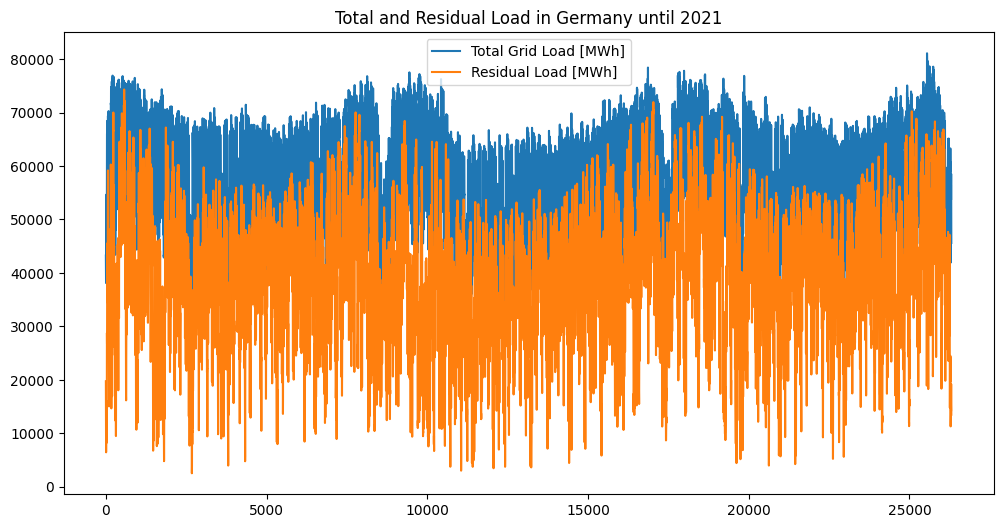

In [197]:
#plot demand data train horuly 
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Total (Grid Load) [MWh]'], label='Total Grid Load [MWh]')
plt.plot(merged_data.index, merged_data['Residual Load [MWh]'], label='Residual Load [MWh]')
plt.title("Total and Residual Load in Germany until 2021")
plt.legend()
plt.show()

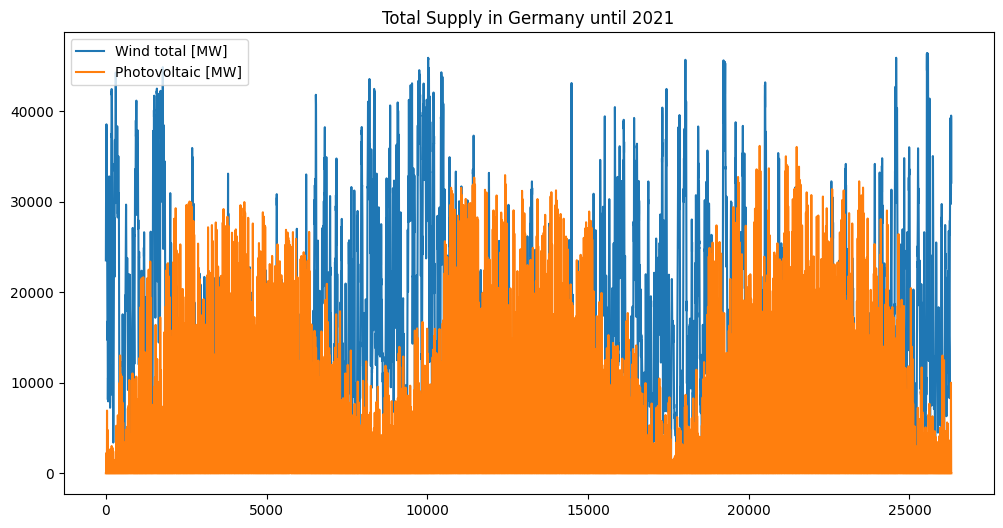

In [198]:
# plot supply data train hourly
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Wind total [MW]'], label='Wind total [MW]')
plt.plot(merged_data.index, merged_data['Photovoltaic [MW]'], label='Photovoltaic [MW]')
#plt.xlim(pd.Timestamp('2019-1-1'), pd.Timestamp('2022-1-1'))
plt.title("Total Supply in Germany until 2021")
plt.legend()
plt.show()

In [200]:
dropped_columns = ['year', 'forecast_origin']
merged_data.drop(dropped_columns, axis=1, inplace=True)


In [201]:
# find most significant variables in data for solar energy prediction / wind energy prediction

# normalize data
# check for seasonality
# build data and split in train and validation set



In [202]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    return adfuller(timeseries, autolag='AIC')
# check all variables that are not constant in merged data for stationarity and print only the ones that are not stationary

for column in merged_data.columns:
    if column in ['z','Wind total [MW] installed', 'Photovoltaic [MW] installed', 'Date from']:
        continue
    result = test_stationarity(merged_data[column])
    if result[1] > 0.05:
        print(f"{column} is not stationary with p-value {result[1]}")
    

time is not stationary with p-value 0.2497264637806178
cdir is not stationary with p-value 0.8160654524689828
Wind total [MW] installed is not stationary with p-value 0.7170498448416546
Photovoltaic [MW] installed is not stationary with p-value 0.7644206743883234


In [203]:
merged_data.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],time,cdir,z,msl,blh,...,sund,tp,fsr,u100,v100,t2m_C,Wind total [MW] installed,Photovoltaic [MW] installed,Date from,Germany/Luxembourg [€/MWh]
0,43265.50,19739.75,1375.0,0.0,23525.75,2019-01-01 00:00:00+00:00,0.0,3360.296561,103009.967750,507.635043,...,0.0,0.000000,0.741971,6.545994,1.122055,5.066013,58787.0,44036.0,2019-01-01 00:00:00+00:00,28.32
1,41654.00,16420.25,1533.5,0.0,25233.75,2019-01-01 01:00:00+00:00,0.0,3360.296561,102964.489612,544.627164,...,0.0,0.000038,0.742205,6.838839,1.241379,5.160794,58787.0,44036.0,2019-01-01 01:00:00+00:00,10.07
2,40113.75,14440.25,2598.5,0.0,25673.50,2019-01-01 02:00:00+00:00,0.0,3360.296561,102908.208325,575.103757,...,0.0,0.000070,0.742254,7.183921,1.428783,5.056292,58787.0,44036.0,2019-01-01 02:00:00+00:00,-4.08
3,39313.00,12123.00,3433.5,0.0,27190.00,2019-01-01 03:00:00+00:00,0.0,3360.296561,102827.034387,612.314609,...,0.0,0.000099,0.742272,7.660834,1.501984,4.990331,58787.0,44036.0,2019-01-01 03:00:00+00:00,-9.91
4,39097.25,10120.25,3826.0,0.0,28977.00,2019-01-01 04:00:00+00:00,0.0,3360.296561,102725.913987,660.112603,...,0.0,0.000135,0.742255,8.147790,1.289936,4.952989,58787.0,44036.0,2019-01-01 04:00:00+00:00,-7.41


In [204]:
# make cdir stationary
merged_data['cdir_nonstat'] = merged_data['cdir'].diff().fillna(0)


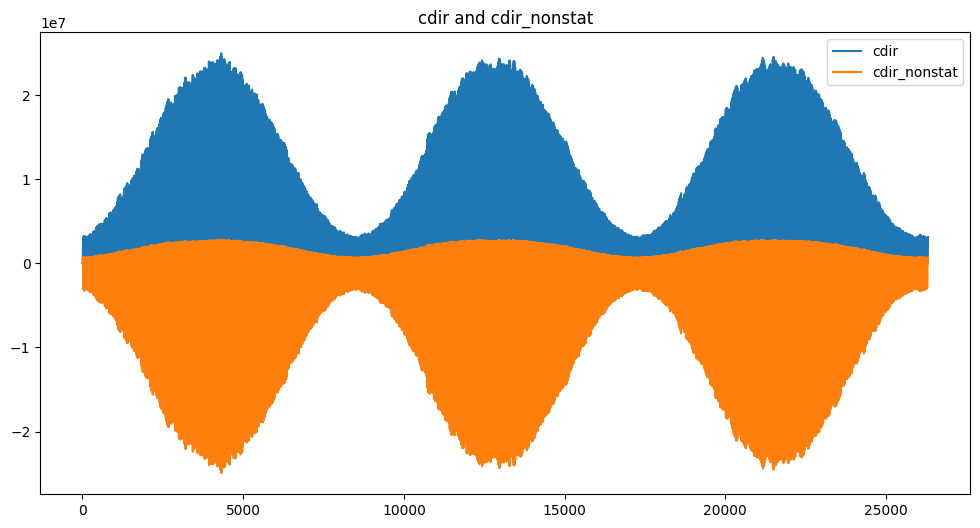

In [205]:
# compare cdir before and after in plot
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index,merged_data['cdir'], label='cdir')
plt.plot(merged_data.index,merged_data['cdir_nonstat'], label='cdir_nonstat')
plt.title("cdir and cdir_nonstat")
plt.legend()
plt.show()


In [206]:
# check non stationary variables again for stationarity
res = test_stationarity(merged_data['cdir_nonstat'])
# p value
print(res[1])

0.0


In [207]:
merged_data.columns


Index(['Total (Grid Load) [MWh]', 'Residual Load [MWh]',
       'Pumped Storage [MWh]', 'Photovoltaic [MW]', 'Wind total [MW]', 'time',
       'cdir', 'z', 'msl', 'blh', 'tcc', 'u10', 'v10', 't2m', 'ssr', 'tsr',
       'sund', 'tp', 'fsr', 'u100', 'v100', 't2m_C',
       'Wind total [MW] installed', 'Photovoltaic [MW] installed', 'Date from',
       'Germany/Luxembourg [€/MWh]', 'cdir_nonstat'],
      dtype='object')

In [208]:
merged_data['wind_speed_10'] = np.sqrt(merged_data['u10']**2 + merged_data['v10']**2)
merged_data['wind_speed_100'] = np.sqrt(merged_data['u100']**2 + merged_data['v100']**2)

In [224]:
# add columns for hour, day in month, day of week, month, day of year
merged_data['hour'] = merged_data['time'].dt.hour
merged_data['day'] = merged_data['time'].dt.day
merged_data['day_of_week'] = merged_data['time'].dt.dayofweek
merged_data['month'] = merged_data['time'].dt.month
merged_data['day_of_year'] = merged_data['time'].dt.dayofyear
merged_data.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],time,cdir,z,msl,blh,...,Date from,Germany/Luxembourg [€/MWh],cdir_nonstat,wind_speed_10,wind_speed_100,hour,day,day_of_week,month,day_of_year
0,43265.50,19739.75,1375.0,0.0,23525.75,2019-01-01 00:00:00+00:00,0.0,3360.296561,103009.967750,507.635043,...,2019-01-01 00:00:00+00:00,28.32,0.0,4.011230,6.641464,0,1,1,1,1
1,41654.00,16420.25,1533.5,0.0,25233.75,2019-01-01 01:00:00+00:00,0.0,3360.296561,102964.489612,544.627164,...,2019-01-01 01:00:00+00:00,10.07,0.0,4.241842,6.950593,1,1,1,1,1
2,40113.75,14440.25,2598.5,0.0,25673.50,2019-01-01 02:00:00+00:00,0.0,3360.296561,102908.208325,575.103757,...,2019-01-01 02:00:00+00:00,-4.08,0.0,4.489959,7.324626,2,1,1,1,1
3,39313.00,12123.00,3433.5,0.0,27190.00,2019-01-01 03:00:00+00:00,0.0,3360.296561,102827.034387,612.314609,...,2019-01-01 03:00:00+00:00,-9.91,0.0,4.796500,7.806685,3,1,1,1,1
4,39097.25,10120.25,3826.0,0.0,28977.00,2019-01-01 04:00:00+00:00,0.0,3360.296561,102725.913987,660.112603,...,2019-01-01 04:00:00+00:00,-7.41,0.0,5.091120,8.249267,4,1,1,1,1


In [225]:
# split data into train and validation set, where train is 2019-2020 and validation is 2021
train = merged_data[merged_data['time'].dt.year <= 2020]
val = merged_data[merged_data['time'].dt.year == 2021]
train.tail()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],time,cdir,z,msl,blh,...,Date from,Germany/Luxembourg [€/MWh],cdir_nonstat,wind_speed_10,wind_speed_100,hour,day,day_of_week,month,day_of_year
17539,54987.75,46207.25,2791.00,0.0,8780.50,2020-12-31 19:00:00+00:00,3312224.975,3360.296561,100557.295950,248.465000,...,2020-12-31 19:00:00+00:00,59.47,0.0,1.845705,3.673088,19,31,3,12,366
17540,51019.75,43073.50,1315.50,0.0,7946.25,2020-12-31 20:00:00+00:00,3312224.975,3360.296561,100572.544637,241.121611,...,2020-12-31 20:00:00+00:00,56.70,0.0,1.671156,3.326368,20,31,3,12,366
17541,48681.25,41671.25,554.75,0.0,7010.00,2020-12-31 21:00:00+00:00,3312224.975,3360.296561,100591.396338,224.251314,...,2020-12-31 21:00:00+00:00,52.44,0.0,1.519065,3.063647,21,31,3,12,366
17542,47451.00,41546.25,233.00,0.0,5904.75,2020-12-31 22:00:00+00:00,3312214.375,3360.296561,100613.012125,203.194001,...,2020-12-31 22:00:00+00:00,51.86,-10.6,1.389600,2.764403,22,31,3,12,366
17543,45235.25,40209.75,457.75,0.0,5025.50,2020-12-31 23:00:00+00:00,3312214.375,3360.296561,100625.638875,193.059544,...,2020-12-31 23:00:00+00:00,52.26,0.0,1.256411,2.481666,23,31,3,12,366


In [226]:
train = train.drop(['cdir', 'time', 'Date from', 'z', 't2m_C','u10', 'v10', 'u100', 'v100'], axis=1)
val = val.drop(['cdir', 'time', 'z', 't2m_C','u10', 'v10', 'u100', 'v100'], axis=1)


In [234]:
SPAN = 24

ema_train = pd.DataFrame()  
ema_val = pd.DataFrame()
# apply Exponential Moving Average to all but the last 5 colums
for column in train.columns[:-5]:
    ema_train[column] = train[column].ewm(span=SPAN).mean()
    ema_val[column] = val[column].ewm(span=SPAN).mean()


ema_train['hour'] = train['hour']
ema_train['day'] = train['day']
ema_train['day_of_week'] = train['day_of_week']
ema_train['month'] = train['month']
ema_train['day_of_year'] = train['day_of_year']
ema_val['hour'] = val['hour']
ema_val['day'] = val['day']
ema_val['day_of_week'] = val['day_of_week']
ema_val['month'] = val['month']
ema_val['day_of_year'] = val['day_of_year']

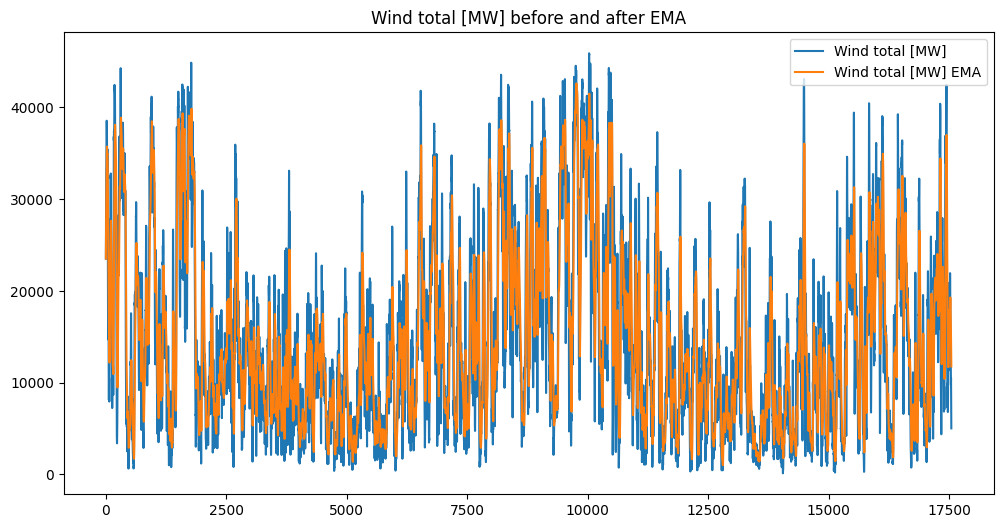

In [235]:
# plot supply data before and afret EMA for april 2020
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Wind total [MW]'], label='Wind total [MW]')
plt.plot(ema_train.index, ema_train['Wind total [MW]'], label='Wind total [MW] EMA')
#plt.xlim(pd.Timestamp('2019-1-1'), pd.Timestamp('2022-1-1'))
plt.title("Wind total [MW] before and after EMA")
plt.legend()
plt.show()



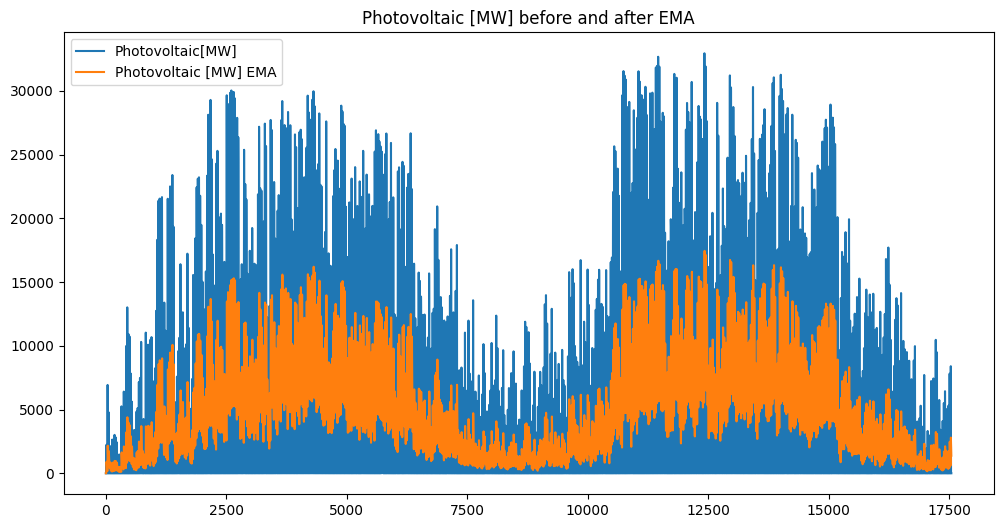

In [236]:
# plot supply data before and afret EMA for april 2020
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Photovoltaic [MW]'], label='Photovoltaic[MW]')
plt.plot(ema_train.index, ema_train['Photovoltaic [MW]'], label='Photovoltaic [MW] EMA')
#plt.xlim(pd.Timestamp('2019-1-1'), pd.Timestamp('2022-1-1'))
plt.title("Photovoltaic [MW] before and after EMA")
plt.legend()
plt.show()


In [247]:
def min_max_norm(x):
    return (x - np.min(x)) * 2 / (np.max(x) - np.min(x)) - 1

def z_norm(arr, epsilon=1e-100):
    return (arr-arr.mean())/(arr.std()+epsilon) 
# apply z score normalization for each colums separately 


In [249]:
z_norm_data_train = ema_train.copy()
z_norm_data_val = ema_val.copy()
for column in z_norm_data_train.columns[:-5]:
    z_norm_data_train[column] = z_norm(z_norm_data_train[column])
z_norm_data_train.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],msl,blh,tcc,t2m,ssr,...,Photovoltaic [MW] installed,Germany/Luxembourg [€/MWh],cdir_nonstat,wind_speed_10,wind_speed_100,hour,day,day_of_week,month,day_of_year
0,-1.925606,-1.751719,-0.206721,-1.350914,0.979487,1.598147,-0.290542,1.673952,-0.777158,-1.4682,...,-1.000712,-0.442579,-0.000328,0.826501,0.834297,0,1,1,1,1
1,-2.052506,-1.932440,-0.023959,-1.350914,1.076062,1.571553,-0.206961,1.655164,-0.769629,-1.4682,...,-1.000712,-1.178997,-0.000328,0.915024,0.907430,1,1,1,1,1
2,-2.178887,-2.067356,0.889121,-1.350914,1.125437,1.539868,-0.131373,1.662470,-0.772886,-1.4682,...,-1.000712,-1.820183,-0.000328,1.010566,0.993166,2,1,1,1,1
3,-2.276010,-2.202906,1.865534,-1.350914,1.196479,1.498373,-0.048176,1.683429,-0.777348,-1.4682,...,-1.000712,-2.267076,-0.000328,1.121901,1.097651,3,1,1,1,1
4,-2.341669,-2.332985,2.652588,-1.350914,1.284432,1.446950,0.050170,1.698764,-0.781348,-1.4682,...,-1.000712,-2.488523,-0.000328,1.239348,1.207228,4,1,1,1,1


In [248]:
min_max_norm_data_train = ema_train.copy()
min_max_norm_data_val = ema_val.copy()
for column in min_max_norm_data_train.columns[:-5]:
    min_max_norm_data_train[column] = min_max_norm(min_max_norm_data_train[column])
min_max_norm_data_train.head()
for column in min_max_norm_data_val.columns[:-5]:
    min_max_norm_data_val[column] = min_max_norm(min_max_norm_data_val[column])

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],msl,blh,tcc,t2m,ssr,...,Photovoltaic [MW] installed,Germany/Luxembourg [€/MWh],cdir_nonstat,wind_speed_10,wind_speed_100,hour,day,day_of_week,month,day_of_year
0,-0.730146,-0.660338,-0.438109,-1.0,0.082166,0.540602,-0.452662,0.984430,-0.394922,-1.0,...,-1.0,0.074625,0.210773,-0.159072,-0.119163,0,1,1,1,1
1,-0.781462,-0.720598,-0.392213,-1.0,0.124917,0.532671,-0.426569,0.976622,-0.391914,-1.0,...,-1.0,-0.064962,0.210773,-0.130838,-0.095094,1,1,1,1,1
2,-0.832569,-0.765585,-0.162918,-1.0,0.146773,0.523220,-0.402971,0.979658,-0.393215,-1.0,...,-1.0,-0.186499,0.210773,-0.100365,-0.066879,2,1,1,1,1
3,-0.871843,-0.810783,0.082282,-1.0,0.178221,0.510844,-0.376998,0.988369,-0.394997,-1.0,...,-1.0,-0.271207,0.210773,-0.064856,-0.032493,3,1,1,1,1
4,-0.898395,-0.854157,0.279929,-1.0,0.217155,0.495507,-0.346295,0.994742,-0.396595,-1.0,...,-1.0,-0.313182,0.210773,-0.027397,0.003569,4,1,1,1,1


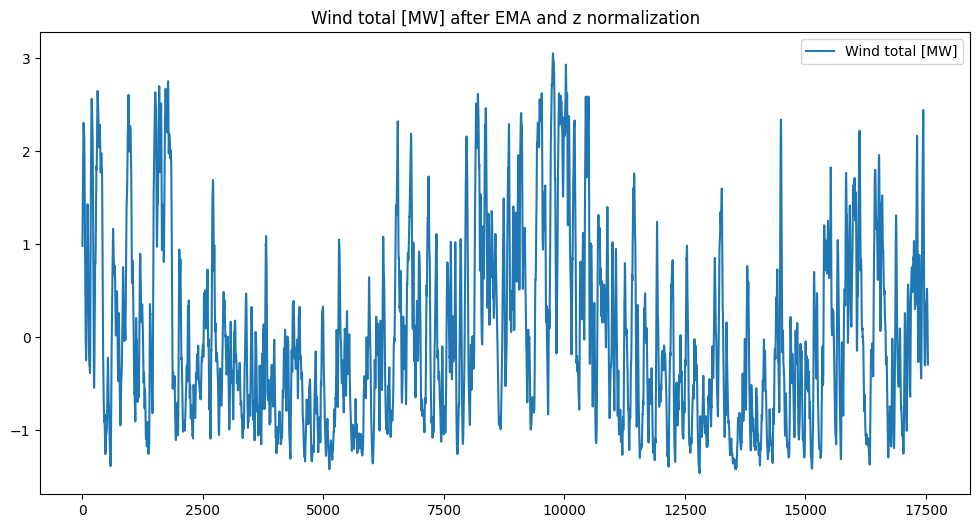

In [250]:
# plot supply data before and afret EMA for april 2020
plt.figure(figsize=(12, 6))
#plt.plot(final_dataset.index, final_dataset['Wind total [MW]_x'], label='Wind total [MW]')
plt.plot(z_norm_data_train.index, z_norm_data_train['Wind total [MW]'], label='Wind total [MW]')
# use dates as x axis description
#plt.xlim(pd.Timestamp('2019-1-1'), pd.Timestamp('2022-1-1'))

plt.title("Wind total [MW] after EMA and z normalization")
plt.legend()
plt.show()

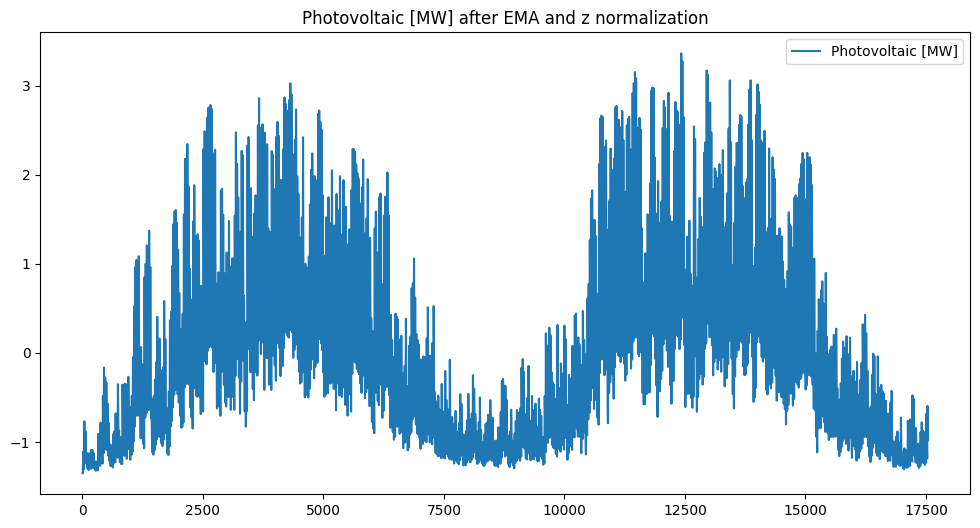

In [251]:
# plot supply data before and afret EMA for april 2020
plt.figure(figsize=(12, 6))
#plt.plot(final_dataset.index, final_dataset['Wind total [MW]_x'], label='Wind total [MW]')
plt.plot(z_norm_data_train.index, z_norm_data_train['Photovoltaic [MW]'], label='Photovoltaic [MW]')
# use dates as x axis description
#plt.xlim(pd.Timestamp('2019-1-1'), pd.Timestamp('2022-1-1'))

plt.title("Photovoltaic [MW] after EMA and z normalization")
plt.legend()
plt.show()

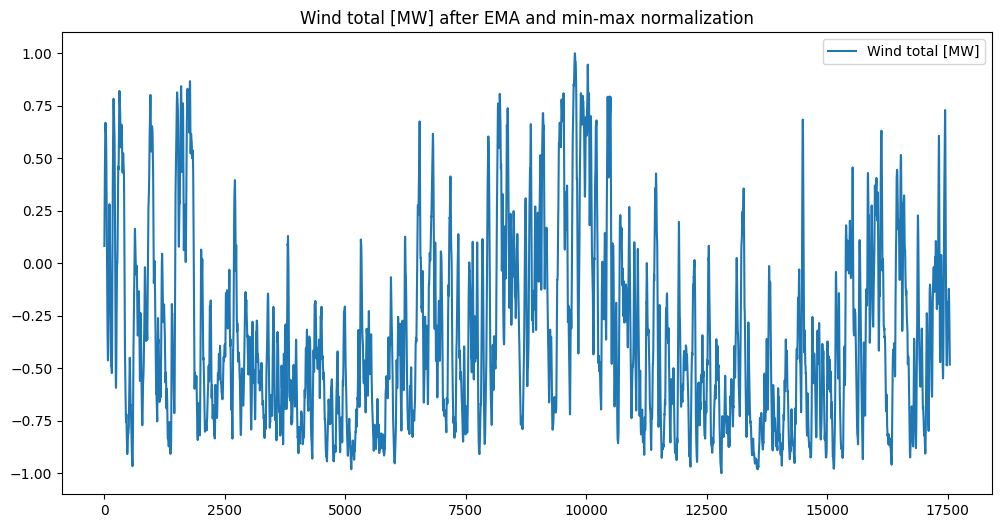

In [252]:
plt.figure(figsize=(12, 6))
plt.plot(min_max_norm_data_train.index, min_max_norm_data_train['Wind total [MW]'], label='Wind total [MW]')
plt.title("Wind total [MW] after EMA and min-max normalization")
plt.legend()
plt.show()

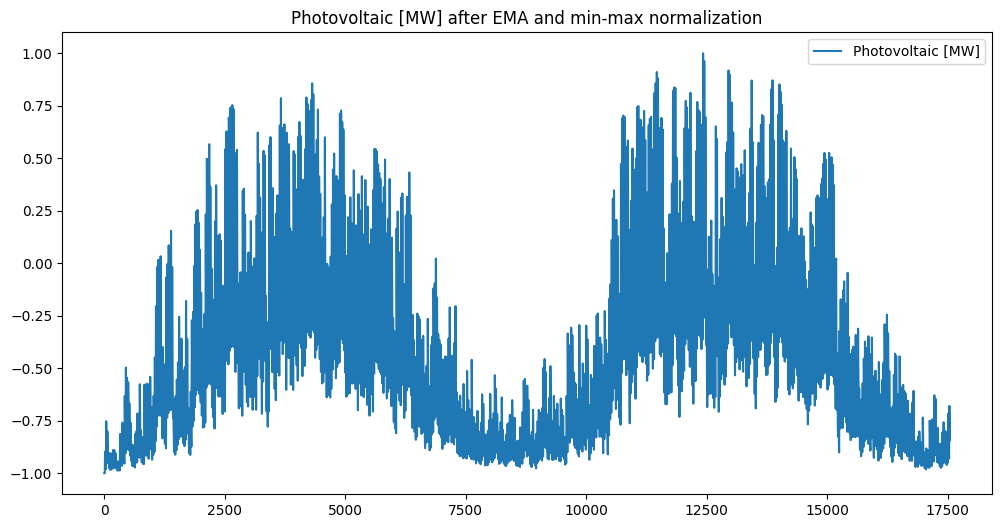

In [253]:
plt.figure(figsize=(12, 6))
plt.plot(min_max_norm_data_train.index, min_max_norm_data_train['Photovoltaic [MW]'], label='Photovoltaic [MW]')
plt.title("Photovoltaic [MW] after EMA and min-max normalization")
plt.legend()
plt.show()

In [256]:
correlation = min_max_norm_data_train.corr()
correlation['Photovoltaic [MW]'].sort_values(ascending=False)

Photovoltaic [MW]              1.000000
ssr                            0.770096
tsr                            0.744183
sund                           0.733414
t2m                            0.653185
cdir_nonstat                   0.446411
blh                            0.370773
fsr                            0.345234
hour                           0.292776
msl                            0.197297
Photovoltaic [MW] installed    0.059782
Wind total [MW] installed      0.059782
day                            0.046327
day_of_week                   -0.000830
Pumped Storage [MWh]          -0.061829
day_of_year                   -0.108632
month                         -0.110809
Residual Load [MWh]           -0.198384
Germany/Luxembourg [€/MWh]    -0.223631
Total (Grid Load) [MWh]       -0.275653
tp                            -0.295089
wind_speed_10                 -0.304183
wind_speed_100                -0.370069
Wind total [MW]               -0.393721
tcc                           -0.537810


In [257]:
#pearson correlation to find most significant variables for wind energy supply  
correlation['Wind total [MW]'].sort_values(ascending=False)

Wind total [MW]                1.000000
wind_speed_100                 0.940206
wind_speed_10                  0.933357
blh                            0.492766
Pumped Storage [MWh]           0.333971
tp                             0.310306
Total (Grid Load) [MWh]        0.307111
tcc                            0.288912
Wind total [MW] installed      0.032956
Photovoltaic [MW] installed    0.032956
day_of_week                    0.000155
cdir_nonstat                  -0.011193
hour                          -0.011685
day                           -0.065008
fsr                           -0.149107
month                         -0.176906
day_of_year                   -0.180472
msl                           -0.247890
t2m                           -0.365318
Photovoltaic [MW]             -0.393721
sund                          -0.416349
tsr                           -0.428379
ssr                           -0.433120
Germany/Luxembourg [€/MWh]    -0.462752
Residual Load [MWh]           -0.598190


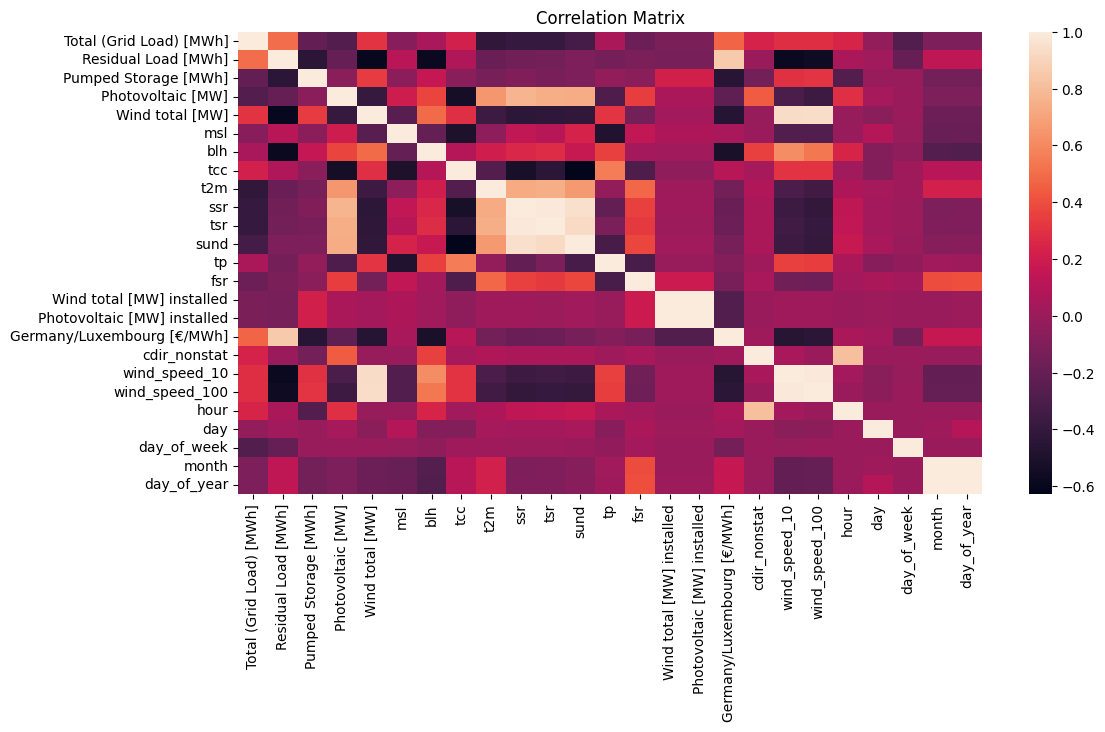

In [258]:
#plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=False)
# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)
# remove values in matrix
plt.title("Correlation Matrix")
plt.show()

In [262]:
# select only the most significant variables for solar energy prediction
significant_solar = correlation['Photovoltaic [MW]'].sort_values(ascending=False).index[:6]
# add hour, day, day of week, month and day of year
significant_solar = significant_solar.append(pd.Index(['hour', 'day', 'day_of_week', 'month', 'day_of_year']))
significant_solar

Index(['Photovoltaic [MW]', 'ssr', 'tsr', 'sund', 't2m', 'cdir_nonstat',
       'hour', 'day', 'day_of_week', 'month', 'day_of_year'],
      dtype='object')

In [261]:
significant_wind = correlation['Wind total [MW]'].sort_values(ascending=False).index[:6]
significant_wind = significant_wind.append(pd.Index(['hour', 'day', 'day_of_week', 'month', 'day_of_year']))
significant_wind


Index(['Wind total [MW]', 'wind_speed_100', 'wind_speed_10', 'blh',
       'Pumped Storage [MWh]', 'tp', 'hour', 'day', 'day_of_week', 'month',
       'day_of_year'],
      dtype='object')

In [263]:
# save the 6 most significant variables for solar and wind energy prediction in files 
training_data_path = "data/training_data/"
if not os.path.exists(training_data_path):
    os.makedirs(training_data_path)

min_max_norm_data_train[significant_solar].to_csv(training_data_path + "train_solar.csv", index=False)
min_max_norm_data_train[significant_wind].to_csv(training_data_path + "train_wind.csv", index=False)
min_max_norm_data_val[significant_solar].to_csv(training_data_path + "val_solar.csv", index=False)
min_max_norm_data_val[significant_wind].to_csv(training_data_path + "val_wind.csv", index=False)
